In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
file_path = '/content/lukemia_3C_fixed.csv'
data = pd.read_csv(file_path)

In [ ]:
# Step-1: Data Pre-processing
# Quick data inspection
print("Dataset Preview:")
display(data.head())
print("\nDataset Information:")
data.info()
print("\nDescriptive Statistics:")
print(data.describe())

Dataset Preview:


,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,CLASS
0,-342.0,-200.0,41.0,328.0,-224.0,-427.0,-656.0,-292.0,137.0,-144.0,...,1023.0,67.0,214.0,-135.0,1074.0,475.0,48.0,168.0,-70.0,b'B-cell'
1,-87.0,-248.0,262.0,295.0,-226.0,-493.0,367.0,-452.0,194.0,162.0,...,529.0,-295.0,352.0,-67.0,67.0,263.0,-33.0,-33.0,-21.0,b'B-cell'
2,-62.0,-23.0,-7.0,142.0,-233.0,-284.0,-167.0,-97.0,-12.0,-70.0,...,383.0,46.0,104.0,15.0,245.0,164.0,84.0,100.0,-18.0,b'B-cell'
3,22.0,-153.0,17.0,276.0,-211.0,-250.0,55.0,-141.0,0.0,500.0,...,399.0,16.0,558.0,24.0,893.0,297.0,6.0,1971.0,-42.0,b'B-cell'
4,86.0,-36.0,-141.0,252.0,-201.0,-384.0,-420.0,-197.0,-60.0,-468.0,...,91.0,-84.0,615.0,-52.0,1235.0,9.0,7.0,1545.0,-81.0,b'B-cell'



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Columns: 7130 entries, AFFX-BioB-5_at to CLASS
dtypes: float64(7129), object(1)
memory usage: 3.9+ MB

Descriptive Statistics:
       AFFX-BioB-5_at  AFFX-BioB-M_at  AFFX-BioB-3_at  AFFX-BioC-5_at  \
count       72.000000       72.000000       72.000000       72.000000   
mean      -114.583333     -160.125000       -8.069444      189.347222   
std         97.738333       96.136631      122.697995      111.884014   
min       -476.000000     -531.000000     -410.000000      -36.000000   
25%       -148.000000     -213.500000      -77.250000       99.500000   
50%       -100.500000     -144.000000      -14.000000      179.000000   
75%        -57.500000      -96.750000       49.000000      277.750000   
max         86.000000      -13.000000      312.000000      431.000000   

       AFFX-BioC-3_at  AFFX-BioDn-5_at  AFFX-BioDn-3_at  AFFX-CreX-5_at  \
count       72.000000        72.000000        72

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])


Missing Values:
 Series([], dtype: int64)


In [ ]:
# Identify numeric and categorical columns
numeric_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(exclude=['number']).columns

# Fill missing values for numeric columns with the mean
for col in numeric_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Fill missing values for categorical columns with the mode
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verify if missing values are handled
print("Missing Values after Imputation:\n", data.isnull().sum())

Missing Values after Imputation:
 AFFX-BioB-5_at    0
AFFX-BioB-M_at    0
AFFX-BioB-3_at    0
AFFX-BioC-5_at    0
AFFX-BioC-3_at    0
                 ..
Z17240_at         0
L49218_f_at       0
M71243_f_at       0
Z78285_f_at       0
CLASS             0
Length: 7130, dtype: int64


In [ ]:
# Encode the 'CLASS' column (target variable)
label_encoder = LabelEncoder()
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])  # Encodes class labels as numeric
target = data['CLASS']  # Target variable

# Separate features and target
features = data.drop(columns=['CLASS'])

In [ ]:
# Standardize the numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Train-Test Split (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

print("Preprocessing completed successfully. Shape of scaled features:", features_scaled.shape)

Preprocessing completed successfully. Shape of scaled features: (72, 7129)


In [ ]:
# Step-2 Dimensionality Reduction with PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA().fit(X_train)

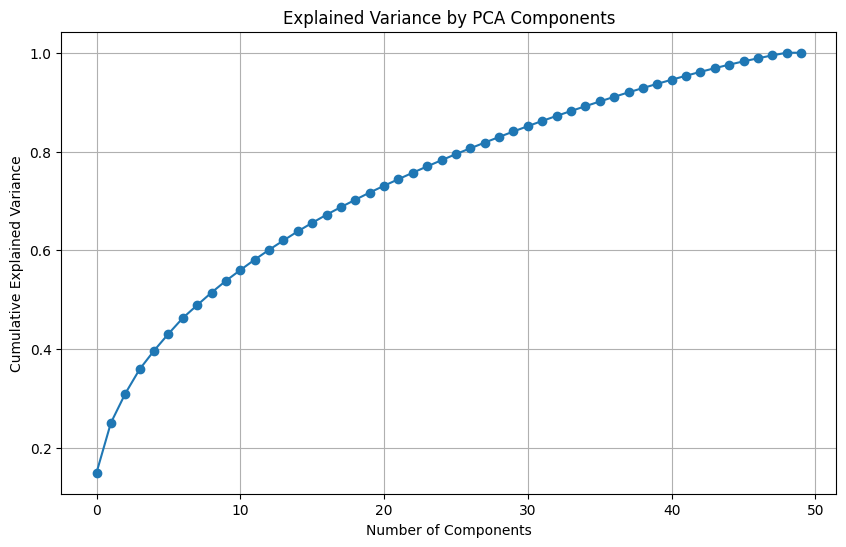

In [ ]:

# Plot cumulative explained variance to select number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [ ]:
# Choose a number of components that explain ~95% of variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components explaining ~95% variance: {n_components}")

Number of components explaining ~95% variance: 42


In [ ]:
# Step-3 Model Training and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix

In [ ]:
# Initialize a dictionary to store the results
results = {
    "Model": [],
    "Accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "Precision": [],
    "F1 Score": [],
    "MCC": []
}

# Define a list of models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Adaboost + Random Forest": AdaBoostClassifier(estimator=RandomForestClassifier(), random_state=42),
    "Adaboost + SVM": AdaBoostClassifier(estimator=SVC(probability=True), random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
}

In [ ]:
# Ensemble (Stacking)
stacking_model = StackingClassifier(
    estimators=[
        ('naive_bayes', GaussianNB()),
        ('svm', SVC(probability=True)),
        ('random_forest', RandomForestClassifier())
    ],
    final_estimator=LogisticRegression(),
    stack_method='predict_proba',
    cv=5
)
models["Stacking Ensemble"] = stacking_model


Without PCA

In [ ]:

# Train and evaluate each model
for name, model in models.items():
    # Fit model on original feature set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred, average='macro')
    specificity = recall_score(y_test, y_pred, pos_label=0, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    mcc = matthews_corrcoef(y_test, y_pred)

    # Store results
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Sensitivity"].append(sensitivity)
    results["Specificity"].append(specificity)
    results["Precision"].append(precision)
    results["F1 Score"].append(f1)
    results["MCC"].append(mcc)

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)
print("\nModel Performance on Original Feature Set:")
display(results_df)


Model Performance on Original Feature Set:


,Model,Accuracy,Sensitivity,Specificity,Precision,F1 Score,MCC
0,Logistic Regression,0.863636,0.809524,0.809524,0.888889,0.817369,0.741803
1,K-Nearest Neighbors,0.681818,0.476190,0.476190,0.728070,0.507071,0.299187
2,SVM,0.681818,0.476190,0.476190,0.450292,0.453102,0.304390
3,Naïve Bayes,0.863636,0.809524,0.809524,0.888889,0.817369,0.741803
4,Decision Tree,0.727273,0.619048,0.619048,0.466667,0.498168,0.580948
5,Random Forest,0.818182,0.666667,0.666667,0.513889,0.577778,0.667561
6,Adaboost + Random Forest,0.772727,0.642857,0.642857,0.481481,0.526116,0.637377
7,Adaboost + SVM,0.636364,0.333333,0.333333,0.212121,0.259259,0.000000
8,XGBoost,0.863636,0.809524,0.809524,0.865079,0.798413,0.754063
9,Stacking Ensemble,0.909091,0.892857,0.892857,0.909524,0.891534,0.831379


In [ ]:
# Find the index of the row with the highest accuracy
best_index = results_df["Accuracy"].idxmax()

# Extract the information about the best classifier
best_classifier_name = results_df.loc[best_index, "Model"]
best_classifier_accuracy = results_df.loc[best_index, "Accuracy"]

# Print conclusion
print(f"The best classifier is '{best_classifier_name}' with an accuracy of {best_classifier_accuracy:.2%}.")

The best classifier is 'Stacking Ensemble' with an accuracy of 90.91%.


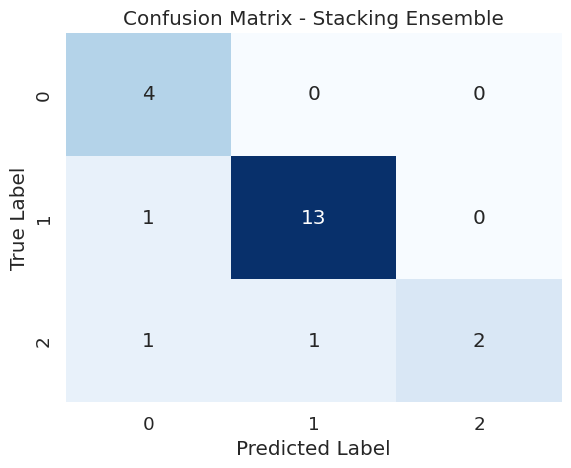

In [ ]:
# Access the best classifier
best_classifier = models[best_classifier_name]

# Train the best classifier
best_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for the best classifier
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - {best_classifier_name}")
plt.show()

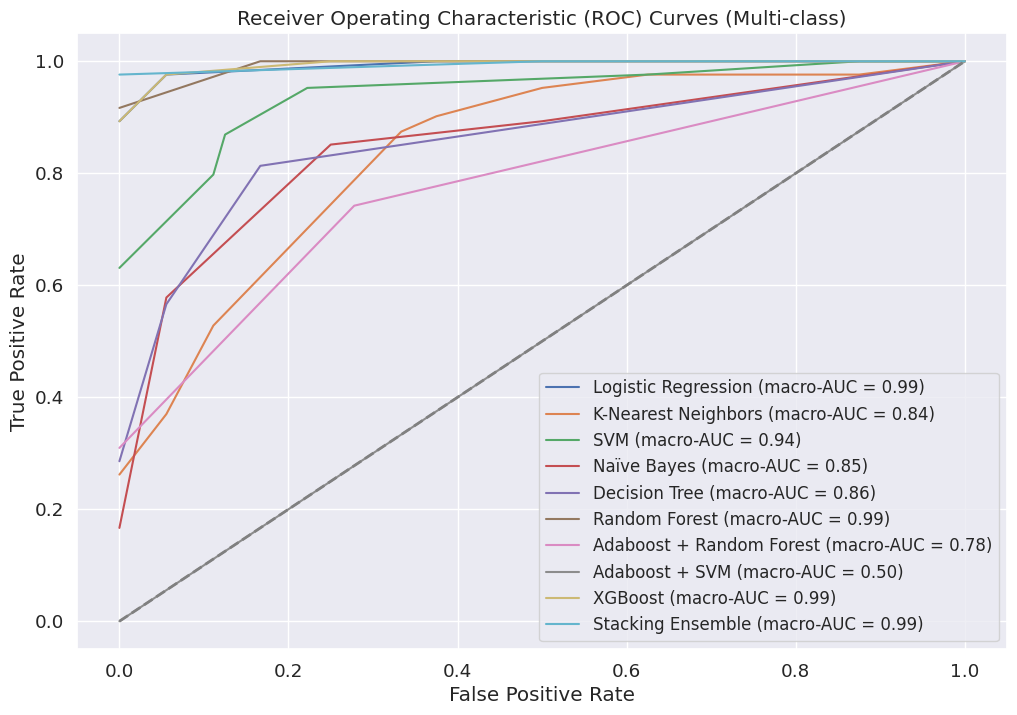

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC (One-vs-Rest)
classes = np.unique(y_train)  # Get unique classes
y_test_binarized = label_binarize(y_test, classes=classes)
y_train_binarized = label_binarize(y_train, classes=classes)
n_classes = len(classes)

# Initialize a figure for ROC curves
plt.figure(figsize=(12, 8))

# Iterate through models to calculate and plot ROC curves
for name, clf in models.items():
    # Fit the model and get prediction probabilities
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):  # Check if model supports predict_proba
        y_score = clf.predict_proba(X_test)
    else:  # Use decision_function for models like SVC without predict_proba
        y_score = clf.decision_function(X_test)

    # Compute ROC curve and AUC for each class
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot the macro-average ROC curve
    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label=f'{name} (macro-AUC = {roc_auc["macro"]:.2f})'
    )

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)

# Configure the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves (Multi-class)')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()



With PCA


In [ ]:
# Repeat for PCA-transformed feature set
# Initialize a new dictionary to store PCA results
pca_results = {
    "Model": [],
    "Accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "Precision": [],
    "F1 Score": [],
    "MCC": []
}
# ... (previous code) ...

# Perform PCA transformation with the chosen number of components
pca = PCA(n_components=n_components)  # Using n_components from previous analysis
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# ... (rest of the code - the loop using X_train_pca)

# Train and evaluate each model on PCA-transformed data
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred, average='macro')
    specificity = recall_score(y_test, y_pred, pos_label=0, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    mcc = matthews_corrcoef(y_test, y_pred)

    # Store PCA results
    pca_results["Model"].append(name)
    pca_results["Accuracy"].append(accuracy)
    pca_results["Sensitivity"].append(sensitivity)
    pca_results["Specificity"].append(specificity)
    pca_results["Precision"].append(precision)
    pca_results["F1 Score"].append(f1)
    pca_results["MCC"].append(mcc)

# Convert PCA results to a DataFrame for better readability
pca_results_df = pd.DataFrame(pca_results)
print("\nModel Performance on PCA-Reduced Feature Set:")
display(pca_results_df)


Model Performance on PCA-Reduced Feature Set:


,Model,Accuracy,Sensitivity,Specificity,Precision,F1 Score,MCC
0,Logistic Regression,0.863636,0.750000,0.750000,0.941176,0.767742,0.749532
1,K-Nearest Neighbors,0.636364,0.392857,0.392857,0.383333,0.366013,0.139754
2,SVM,0.727273,0.500000,0.500000,0.566667,0.496732,0.447214
3,Naïve Bayes,0.590909,0.309524,0.309524,0.206349,0.247619,-0.115728
4,Decision Tree,0.727273,0.559524,0.559524,0.454902,0.501792,0.450592
5,Random Forest,0.681818,0.416667,0.416667,0.555556,0.400000,0.308607
6,Adaboost + Random Forest,0.772727,0.583333,0.583333,0.509259,0.541667,0.552083
7,Adaboost + SVM,0.636364,0.333333,0.333333,0.212121,0.259259,0.000000
8,XGBoost,0.818182,0.666667,0.666667,0.541176,0.597372,0.661507
9,Stacking Ensemble,0.681818,0.416667,0.416667,0.555556,0.400000,0.308607


<Figure size 1500x800 with 0 Axes>

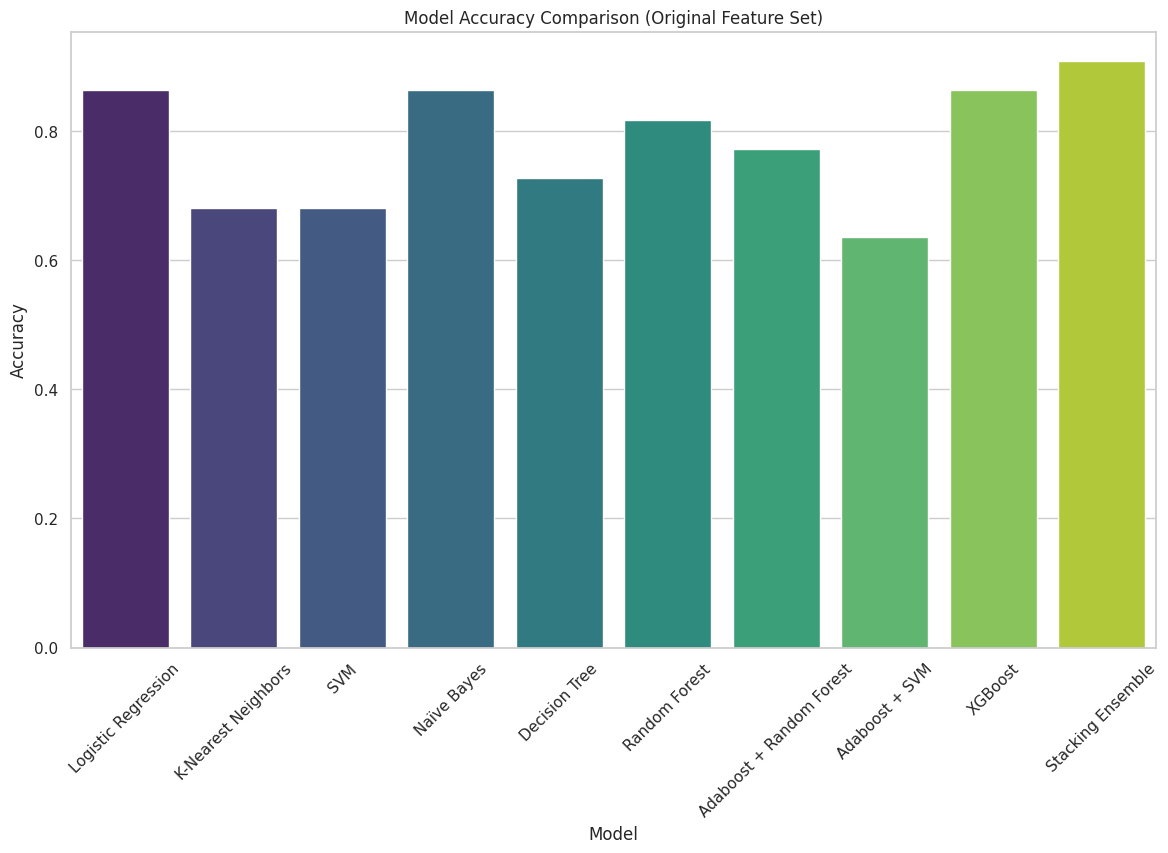

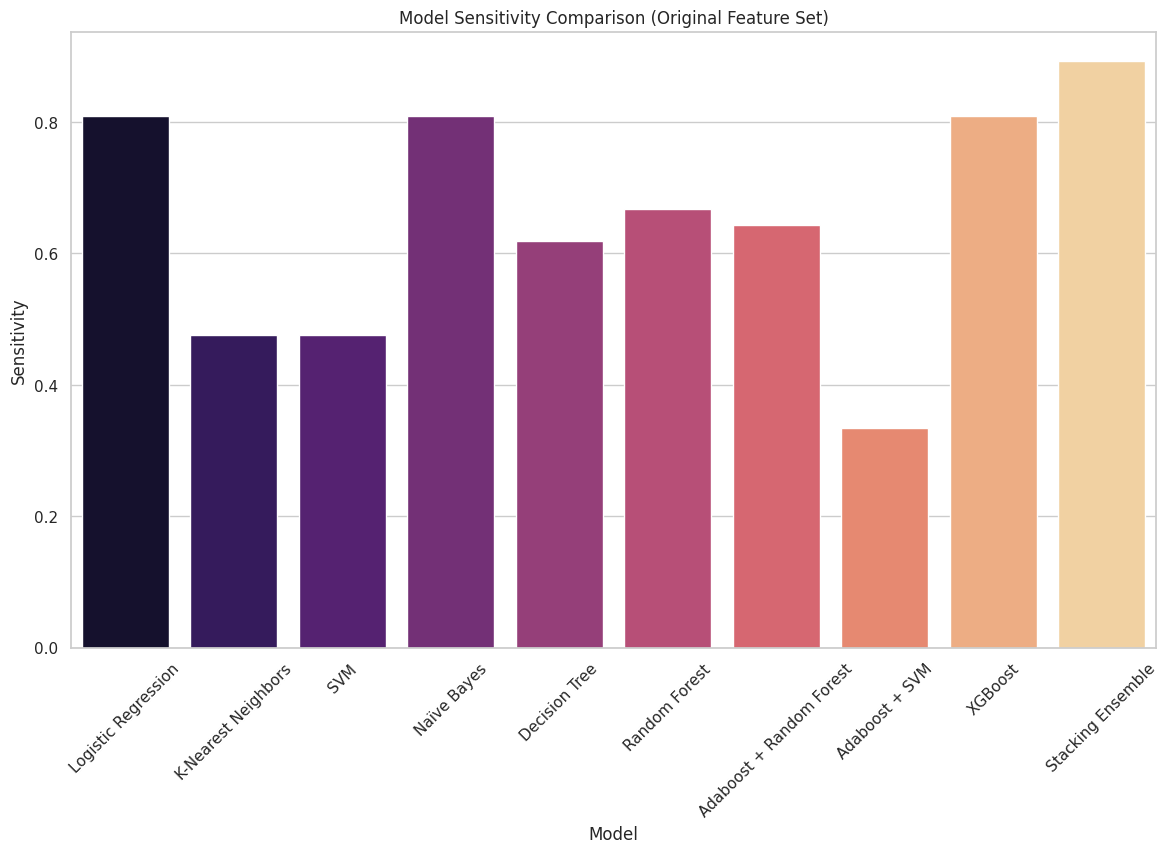

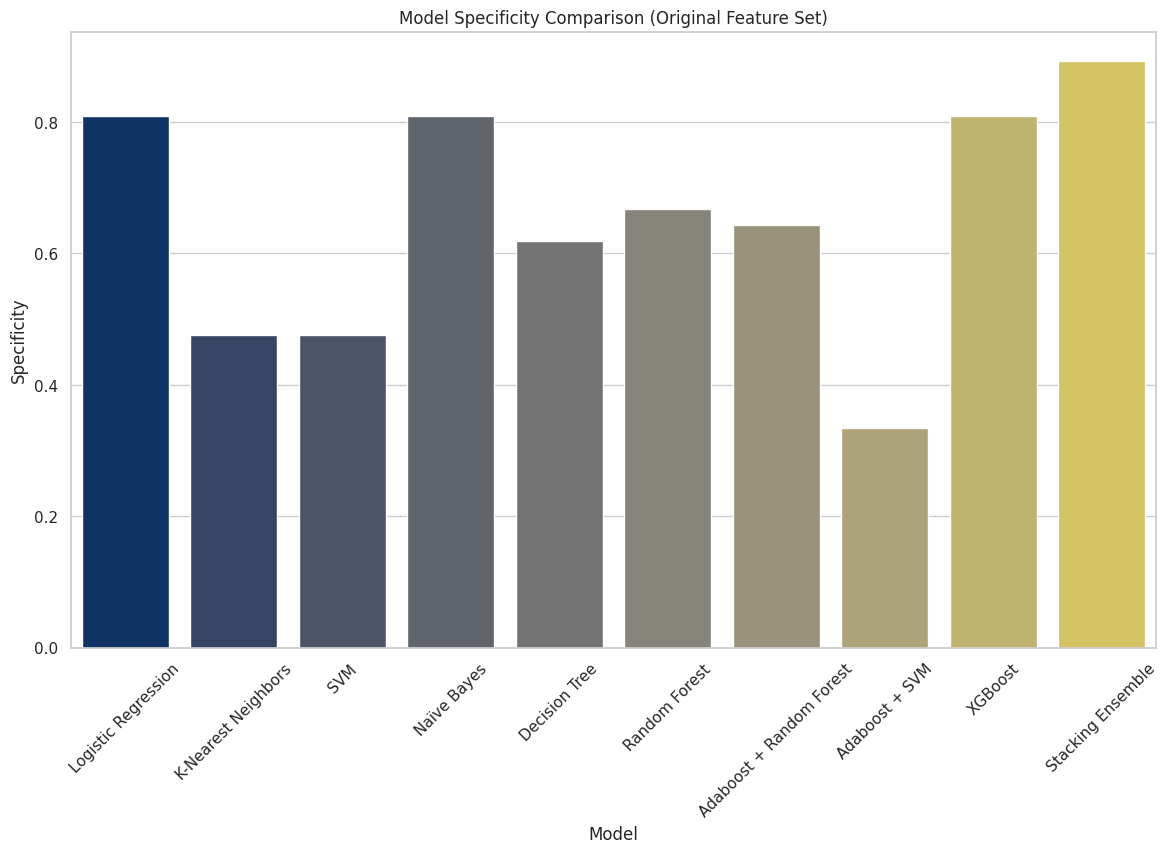

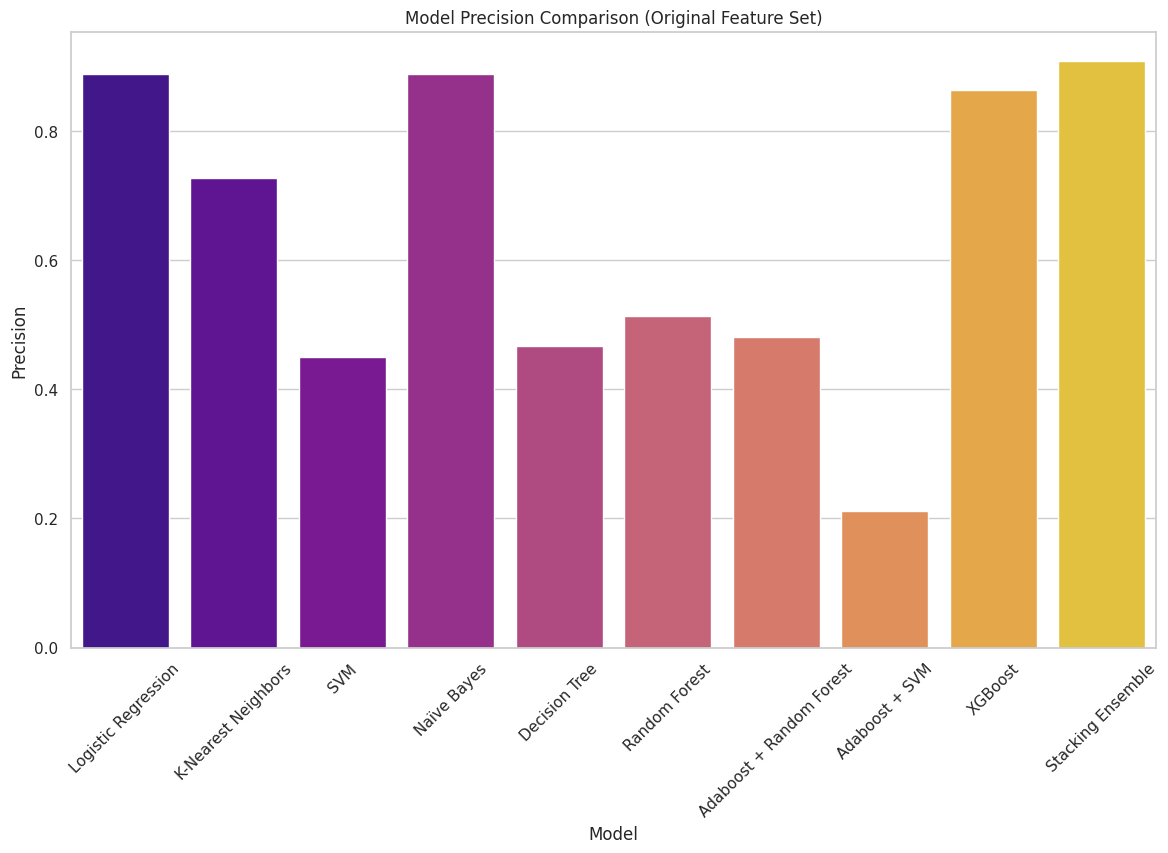

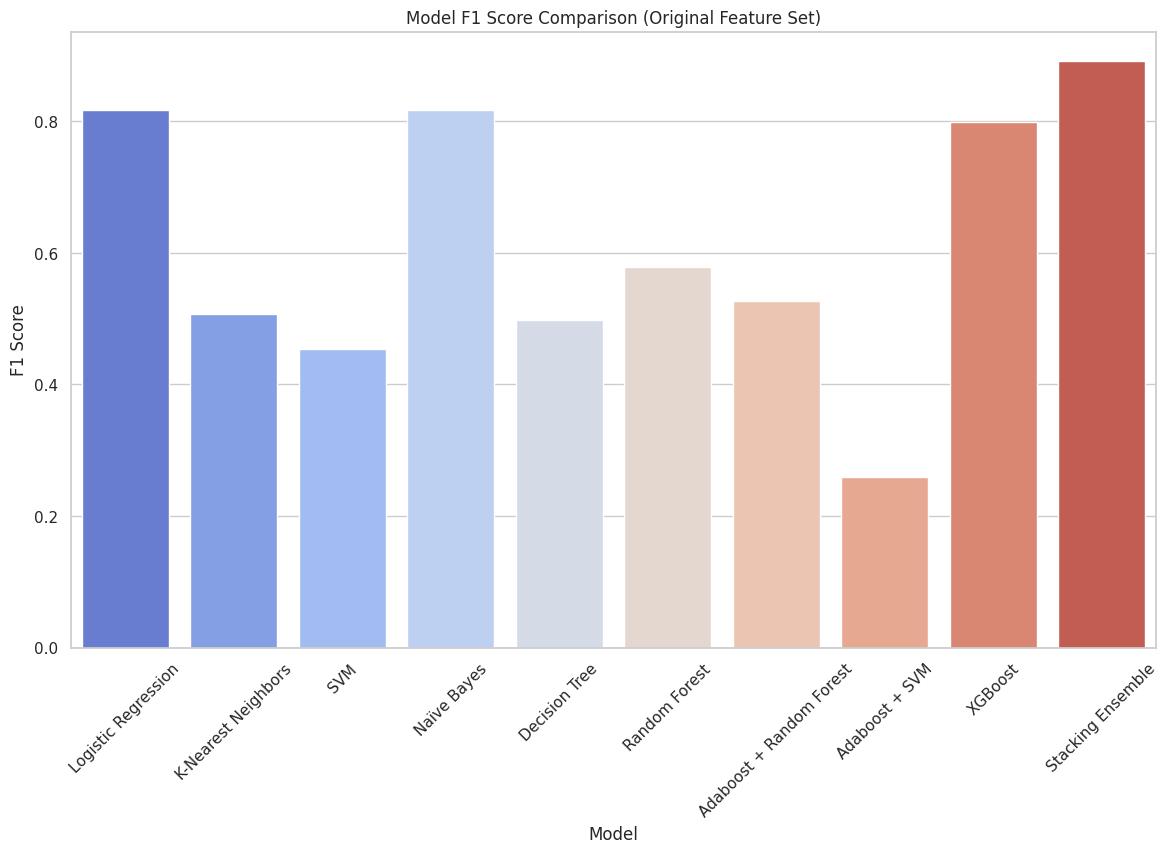

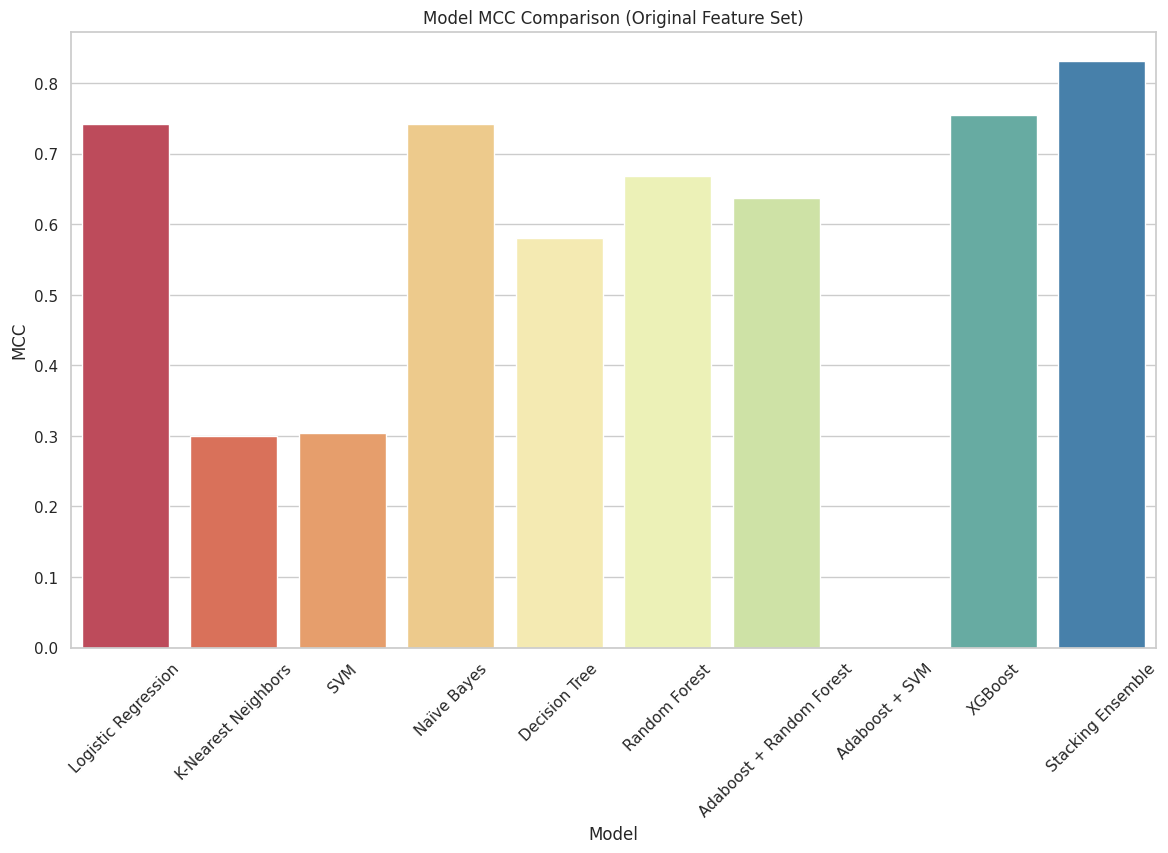

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Convert the results to a DataFrame for easier plotting (original feature set)
results_df = pd.DataFrame(results)

# Plot Accuracy Comparison
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison (Original Feature Set)")
plt.xticks(rotation=45)
plt.show()

# Plot Sensitivity Comparison
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="Sensitivity", data=results_df, palette="magma")
plt.title("Model Sensitivity Comparison (Original Feature Set)")
plt.xticks(rotation=45)
plt.show()

# Plot Specificity Comparison
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="Specificity", data=results_df, palette="cividis")
plt.title("Model Specificity Comparison (Original Feature Set)")
plt.xticks(rotation=45)
plt.show()

# Plot Precision Comparison
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="Precision", data=results_df, palette="plasma")
plt.title("Model Precision Comparison (Original Feature Set)")
plt.xticks(rotation=45)
plt.show()

# Plot F1 Score Comparison
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="F1 Score", data=results_df, palette="coolwarm")
plt.title("Model F1 Score Comparison (Original Feature Set)")
plt.xticks(rotation=45)
plt.show()

# Plot MCC Comparison
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="MCC", data=results_df, palette="Spectral")
plt.title("Model MCC Comparison (Original Feature Set)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Compare the performance of models on original and PCA-reduced datasets
comparison_df = pd.merge(results_df, pca_results_df, on='Model', suffixes=('_Original', '_PCA'))

# Calculate the difference in accuracy between original and PCA datasets
comparison_df['Accuracy_Difference'] = comparison_df['Accuracy_PCA'] - comparison_df['Accuracy_Original']

# Display the comparison dataframe
print("\nComparison of Model Performance (Original vs. PCA):")
display(comparison_df)


Comparison of Model Performance (Original vs. PCA):


,Model,Accuracy_Original,Sensitivity_Original,Specificity_Original,Precision_Original,F1 Score_Original,MCC_Original,Accuracy_PCA,Sensitivity_PCA,Specificity_PCA,Precision_PCA,F1 Score_PCA,MCC_PCA,Accuracy_Difference
0,Logistic Regression,0.863636,0.809524,0.809524,0.888889,0.817369,0.741803,0.863636,0.750000,0.750000,0.941176,0.767742,0.749532,0.000000
1,K-Nearest Neighbors,0.681818,0.476190,0.476190,0.728070,0.507071,0.299187,0.636364,0.392857,0.392857,0.383333,0.366013,0.139754,-0.045455
2,SVM,0.681818,0.476190,0.476190,0.450292,0.453102,0.304390,0.727273,0.500000,0.500000,0.566667,0.496732,0.447214,0.045455
3,Naïve Bayes,0.863636,0.809524,0.809524,0.888889,0.817369,0.741803,0.590909,0.309524,0.309524,0.206349,0.247619,-0.115728,-0.272727
4,Decision Tree,0.727273,0.619048,0.619048,0.466667,0.498168,0.580948,0.727273,0.559524,0.559524,0.454902,0.501792,0.450592,0.000000
5,Random Forest,0.818182,0.666667,0.666667,0.513889,0.577778,0.667561,0.681818,0.416667,0.416667,0.555556,0.400000,0.308607,-0.136364
6,Adaboost + Random Forest,0.772727,0.642857,0.642857,0.481481,0.526116,0.637377,0.772727,0.583333,0.583333,0.509259,0.541667,0.552083,0.000000
7,Adaboost + SVM,0.636364,0.333333,0.333333,0.212121,0.259259,0.000000,0.636364,0.333333,0.333333,0.212121,0.259259,0.000000,0.000000
8,XGBoost,0.863636,0.809524,0.809524,0.865079,0.798413,0.754063,0.818182,0.666667,0.666667,0.541176,0.597372,0.661507,-0.045455
9,Stacking Ensemble,0.909091,0.892857,0.892857,0.909524,0.891534,0.831379,0.681818,0.416667,0.416667,0.555556,0.400000,0.308607,-0.227273


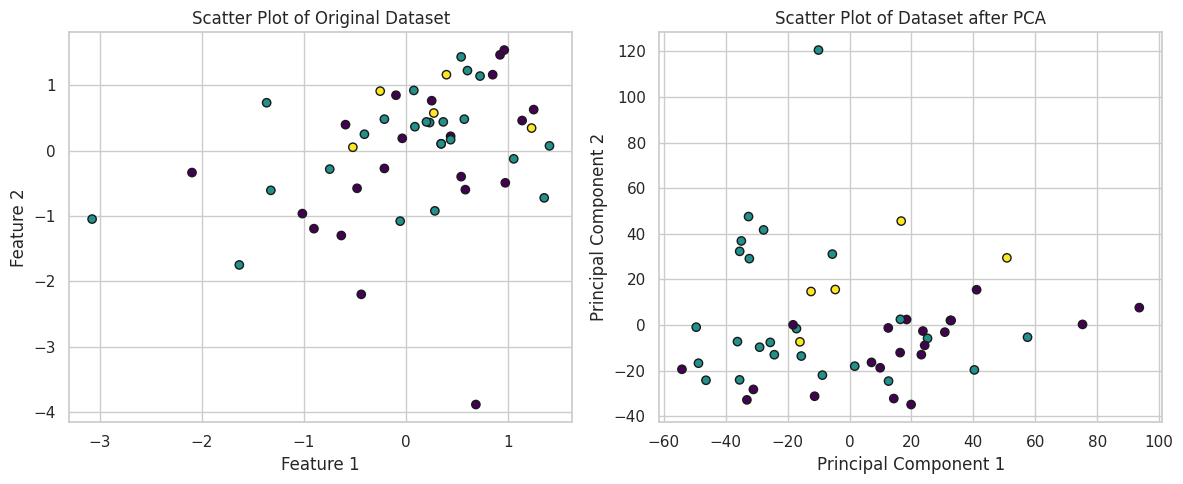

In [ ]:
# Scatter plot for the original dataset and dataset after applying PCA
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for the original dataset
axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k')
axs[0].set_title('Scatter Plot of Original Dataset')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# Scatter plot for the dataset after applying PCA
axs[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k')
axs[1].set_title('Scatter Plot of Dataset after PCA')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In [ ]:
# Find the index of the row with the highest accuracy with PCA
best_index_pca = pca_results_df ["Accuracy"].idxmax()

# Extract the information about the best classifier with PCA
best_classifier_name_pca = pca_results_df.loc[best_index_pca, "Model"]
best_classifier_accuracy_pca = pca_results_df.loc[best_index_pca, "Accuracy"]

# Print conclusion with PCA
print(f"The best classifier with PCA is '{best_classifier_name_pca}' with an accuracy of {best_classifier_accuracy_pca:.2%}.")



The best classifier with PCA is 'Logistic Regression' with an accuracy of 86.36%.


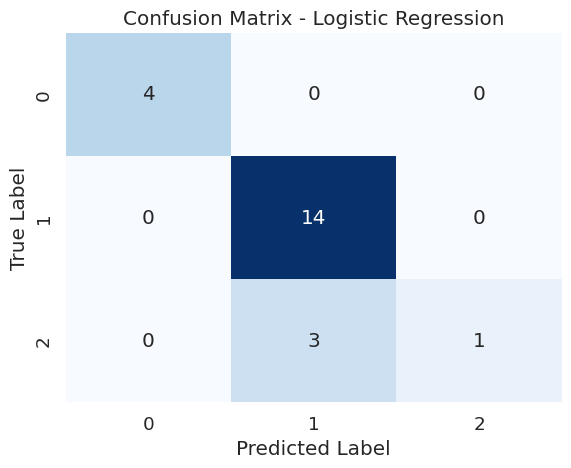

In [ ]:
# Access the best classifier with PCA
best_classifier_pca = models[best_classifier_name_pca.split('PCA + ')[-1]]

# Train the best classifier with PCA
best_classifier_pca.fit(X_train_pca, y_train)

# Make predictions on the test set with PCA
y_pred_pca = best_classifier_pca.predict(X_test_pca)

# Compute confusion matrix with PCA
cm_pca = confusion_matrix(y_test, y_pred_pca)

# Plot confusion matrix for the best classifier with PCA
sns.set(font_scale=1.2)
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - {best_classifier_name_pca}")
plt.show()

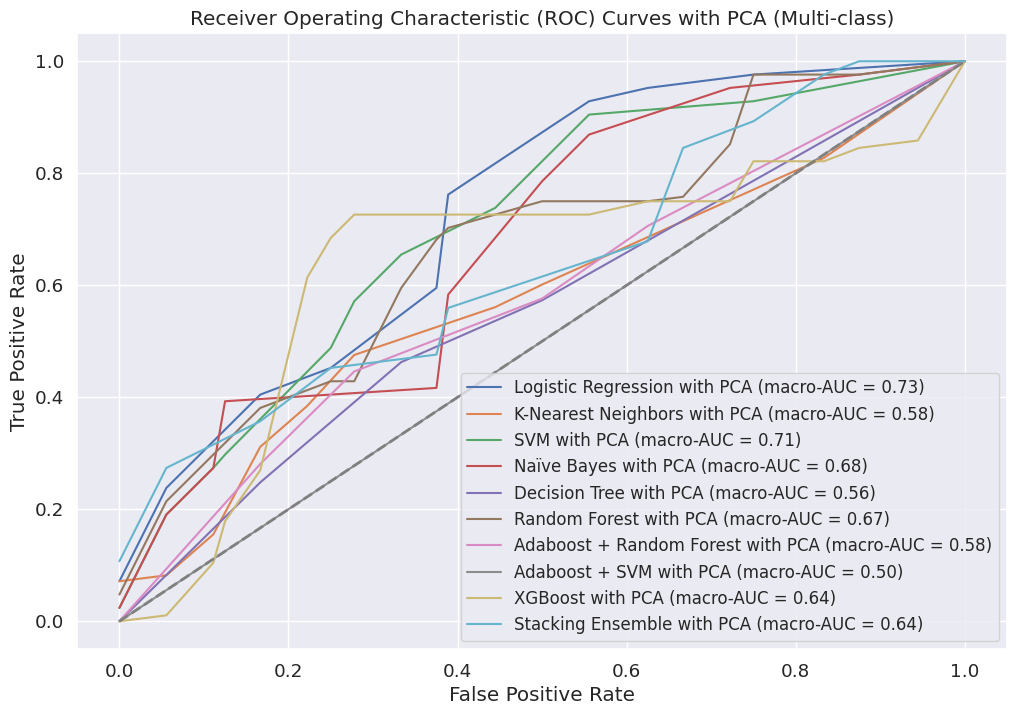

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Perform PCA transformation
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Binarize labels for multi-class
classes = np.unique(y_train)  # Get unique classes
y_test_binarized = label_binarize(y_test, classes=classes)
y_train_binarized = label_binarize(y_train, classes=classes)
n_classes = len(classes)

# Initialize a figure for ROC curves
plt.figure(figsize=(12, 8))

# Iterate through models to calculate and plot ROC curves with PCA
for name, clf in models.items():
    # Fit the model and get prediction probabilities
    clf.fit(X_train_pca, y_train)
    if hasattr(clf, "predict_proba"):  # Check if model supports predict_proba
        y_score = clf.predict_proba(X_test_pca)
    else:  # Use decision_function for models like SVC without predict_proba
        y_score = clf.decision_function(X_test_pca)

    # Compute ROC curve and AUC for each class
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot the macro-average ROC curve
    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label=f'{name} with PCA (macro-AUC = {roc_auc["macro"]:.2f})'
    )

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)

# Configure the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves with PCA (Multi-class)')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()


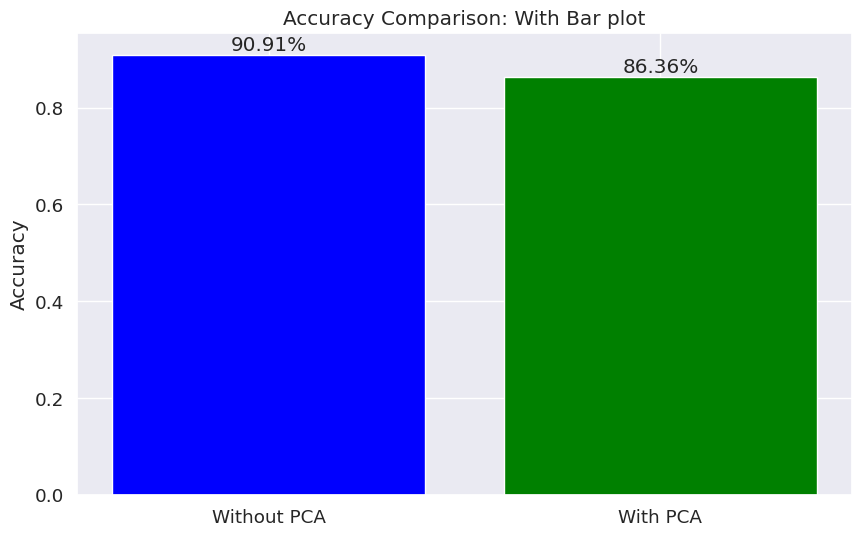

In [ ]:
# Bar plot for accuracy comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(["Without PCA", "With PCA"], [best_classifier_accuracy, best_classifier_accuracy_pca], color=['blue', 'green'])

# Add values inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{round(yval * 100, 2)}%", ha='center', va='bottom')

plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: With Bar plot")
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = '/content/lukemia_3C_fixed.csv'  # Update this path if needed
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop(columns=["CLASS"])  # Features
y = data["CLASS"]  # Target

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Apply Linear Discriminant Analysis (LDA)
lda = LDA(n_components=2)  # Reduce to 2 dimensions
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Define a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000, random_state=42)

# Use GridSearchCV for hyperparameter tuning
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["liblinear", "lbfgs"],  # Solvers for optimization
}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_lda, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test_lda)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Output results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_rep)


Best Parameters: {'C': 0.01, 'solver': 'liblinear'}
Accuracy: 86.36%
Classification Report:
               precision    recall  f1-score   support

      b'AML'       0.86      0.75      0.80         8
   b'B-cell'       0.85      1.00      0.92        11
   b'T-cell'       1.00      0.67      0.80         3

    accuracy                           0.86        22
   macro avg       0.90      0.81      0.84        22
weighted avg       0.87      0.86      0.86        22



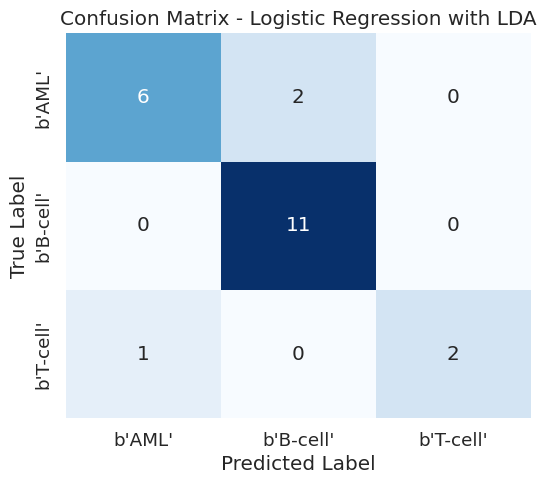

In [ ]:

# Import necessary libraries for confusion matrix plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - Logistic Regression with LDA")
plt.show()


In [ ]:
# Feature Selection using Entropy/Information Gain
from sklearn.feature_selection import mutual_info_classif

# Compute the Information Gain for each feature
info_gain = mutual_info_classif(X_scaled, y_encoded, random_state=42)

# Rank features based on Information Gain
info_gain_ranking = sorted(
    [(f"f{i+1}", score, i) for i, score in enumerate(info_gain)],  # Include index for feature selection
    key=lambda x: x[1], reverse=True
)

# Select the top 10 to 20 features
top_features_count = 20  # Change this to 10, 15, or 20 as needed
top_features = info_gain_ranking[:top_features_count]

# Display ranked features and their scores
print(f"Top {top_features_count} Features based on Information Gain (Entropy):")
for feature, score, _ in top_features:
    print(f"{feature}: {score:.4f}")

# Extract feature indices for the selected features
selected_feature_indices = [index for _, _, index in top_features]

# Create a new dataset with only the selected features
X_selected = X_scaled[:, selected_feature_indices]

# Optional: Display the shape of the reduced dataset
print(f"\nReduced dataset shape: {X_selected.shape}")


Top 20 Features based on Information Gain (Entropy):
f1882: 0.6100
f2642: 0.6091
f2335: 0.5926
f4847: 0.5810
f6855: 0.5480
f1834: 0.5345
f5688: 0.5260
f6041: 0.5192
f5171: 0.5179
f2128: 0.4943
f758: 0.4912
f1685: 0.4814
f2010: 0.4544
f6225: 0.4530
f1144: 0.4517
f6376: 0.4470
f5300: 0.4397
f6725: 0.4365
f760: 0.4357
f2014: 0.4356

Reduced dataset shape: (72, 20)


In [ ]:
# Feature Selection using ANOVA F-value
from sklearn.feature_selection import f_classif

# Compute the F-value for each feature
f_values, p_values = f_classif(X_scaled, y_encoded)

# Rank features based on F-value
anova_ranking = sorted(
    [(f"f{i+1}", f_val, i) for i, f_val in enumerate(f_values)],  # Include index for feature selection
    key=lambda x: x[1], reverse=True
)

# Select the top 20 features
top_features_count = 20  # You can change this to any number (e.g., 10, 15, etc.)
top_features = anova_ranking[:top_features_count]

# Display the top-ranked features and their F-values
print(f"\nTop {top_features_count} Features based on ANOVA F-value:")
for feature, f_val, _ in top_features:
    print(f"{feature}: {f_val:.4f}")

# Extract feature indices for the selected features
selected_feature_indices = [index for _, _, index in top_features]

# Create a new dataset with only the selected features
X_selected = X_scaled[:, selected_feature_indices]

# Optional: Display the shape of the reduced dataset
print(f"\nReduced dataset shape: {X_selected.shape}")



Top 20 Features based on ANOVA F-value:
f4050: 158.2779
f6510: 119.6111
f6606: 75.7042
f6236: 74.5238
f4342: 66.7271
f6696: 65.1928
f5543: 64.2645
f1207: 61.9847
f2794: 60.9634
f4847: 58.8313
f5542: 55.6642
f2642: 48.2736
f2335: 47.8635
f6228: 46.7892
f6225: 46.4688
f1694: 45.7543
f4196: 40.1069
f1834: 39.7761
f1144: 36.1454
f2288: 36.1243

Reduced dataset shape: (72, 20)


In [ ]:
# Feature Selection using Correlation
import numpy as np

# Compute correlation between each feature and the target variable
correlations = []
for i in range(X_scaled.shape[1]):
    correlation = np.corrcoef(X_scaled[:, i], y_encoded)[0, 1]
    correlations.append((f"f{i+1}", abs(correlation), i))  # Store absolute value for ranking

# Rank features based on absolute correlation values
correlation_ranking = sorted(correlations, key=lambda x: x[1], reverse=True)

# Select the top 20 features
top_features_count = 20
top_features = correlation_ranking[:top_features_count]

# Display the top 20 features and their correlation values
print(f"Top {top_features_count} Features based on Correlation:")
for feature, corr_value, _ in top_features:
    print(f"{feature}: {corr_value:.4f}")

# Extract feature indices for the selected features
selected_feature_indices = [index for _, _, index in top_features]

# Create a new dataset with only the selected features
X_selected = X_scaled[:, selected_feature_indices]

# Optional: Display the shape of the reduced dataset
print(f"\nReduced dataset shape: {X_selected.shape}")


Top 20 Features based on Correlation:
f1144: 0.7117
f1207: 0.6993
f4847: 0.6876
f4050: 0.6725
f6510: 0.6582
f1630: 0.6519
f1834: 0.6450
f4196: 0.6436
f1704: 0.6292
f6041: 0.6269
f461: 0.6243
f2288: 0.6236
f2833: 0.6199
f4342: 0.6171
f4936: 0.6160
f4229: 0.6143
f1928: 0.6134
f1268: 0.6116
f1745: 0.6087
f3252: 0.6083

Reduced dataset shape: (72, 20)


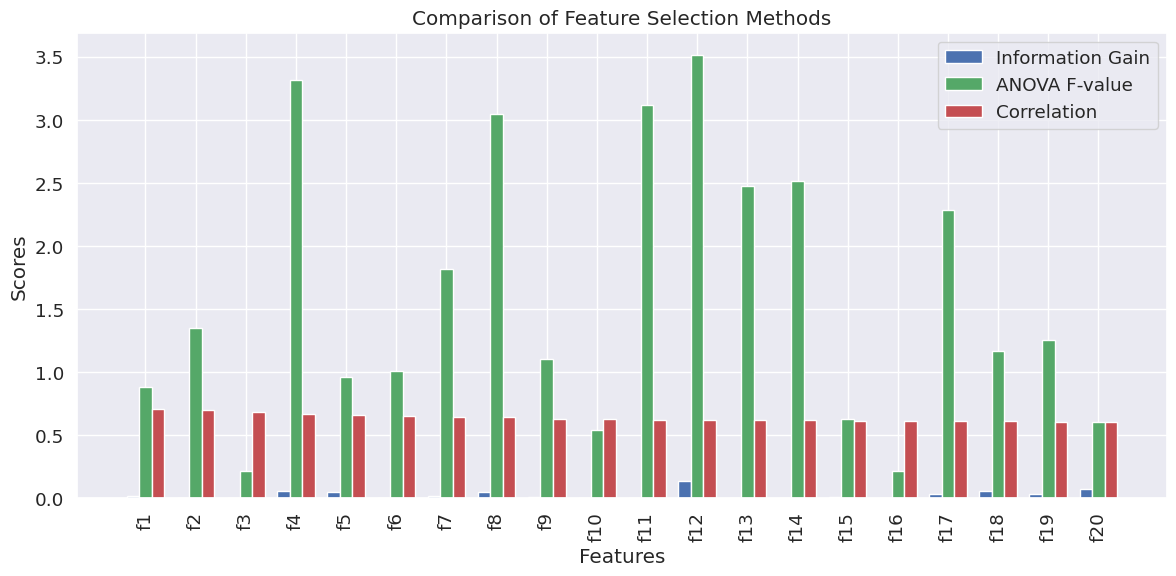

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
methods = ['Information Gain', 'ANOVA F-value', 'Correlation']
top_features_counts = 20

# Prepare the data for each method
info_gain_scores = [score for _, score, _ in info_gain_ranking[:top_features_counts]]
anova_scores = [f_val for _, f_val, _ in anova_ranking[:top_features_counts]]
correlation_scores = [corr_value for _, corr_value, _ in correlation_ranking[:top_features_counts]]

# Feature names for X-axis labels
feature_names = [f"f{i+1}" for i in range(top_features_counts)]

# Set up the plot
x = np.arange(top_features_counts)
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each feature selection method
ax.bar(x - width, info_gain_scores, width, label='Information Gain', color='b')
ax.bar(x, anova_scores, width, label='ANOVA F-value', color='g')
ax.bar(x + width, correlation_scores, width, label='Correlation', color='r')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Features')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Feature Selection Methods')
ax.set_xticks(x)
ax.set_xticklabels(feature_names, rotation=90)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Compute Information Gain
info_gain = mutual_info_classif(X_scaled, y_encoded, random_state=42)
info_gain_ranking = [(f"f{i+1}", score, i) for i, score in enumerate(info_gain)]

# Step 2: Compute ANOVA F-values
f_values, _ = f_classif(X_scaled, y_encoded)
anova_ranking = [(f"f{i+1}", f_val, i) for i, f_val in enumerate(f_values)]

# Step 3: Compute Correlation
correlations = []
for i in range(X_scaled.shape[1]):
    correlation = np.corrcoef(X_scaled[:, i], y_encoded)[0, 1]
    correlations.append((f"f{i+1}", abs(correlation), i))

# Combine rankings into a single DataFrame
ranking_df = pd.DataFrame({
    "Feature": [f"f{i+1}" for i in range(X_scaled.shape[1])],
    "Info_Gain": info_gain,
    "ANOVA_F": f_values,
    "Correlation": [abs(np.corrcoef(X_scaled[:, i], y_encoded)[0, 1]) for i in range(X_scaled.shape[1])]
})

# Step 4: Normalize the rankings using Min-Max Scaling
scaler = MinMaxScaler()
ranking_df[["Info_Gain", "ANOVA_F", "Correlation"]] = scaler.fit_transform(
    ranking_df[["Info_Gain", "ANOVA_F", "Correlation"]]
)

# Step 5: Apply TOPSIS
# Ideal best is max for all criteria; Ideal worst is min for all criteria
ideal_best = ranking_df[["Info_Gain", "ANOVA_F", "Correlation"]].max()
ideal_worst = ranking_df[["Info_Gain", "ANOVA_F", "Correlation"]].min()

# Calculate Euclidean distances to the ideal best and worst
ranking_df["Distance_to_Best"] = np.sqrt(
    ((ranking_df[["Info_Gain", "ANOVA_F", "Correlation"]] - ideal_best) ** 2).sum(axis=1)
)
ranking_df["Distance_to_Worst"] = np.sqrt(
    ((ranking_df[["Info_Gain", "ANOVA_F", "Correlation"]] - ideal_worst) ** 2).sum(axis=1)
)

# Compute the TOPSIS score
ranking_df["Topsis_Score"] = ranking_df["Distance_to_Worst"] / (
    ranking_df["Distance_to_Best"] + ranking_df["Distance_to_Worst"]
)

# Step 6: Rank features based on TOPSIS score
ranking_df = ranking_df.sort_values(by="Topsis_Score", ascending=False)

# Select the top 20 features
top_features_count = 20
top_features = ranking_df.head(top_features_count)

# Display the top features
print(f"Top {top_features_count} Features based on TOPSIS:")
print(top_features[["Feature", "Topsis_Score"]])

# Extract feature indices for the selected features
selected_feature_indices = [int(feature[1:]) - 1 for feature in top_features["Feature"]]

# Create a new dataset with the selected features
X_selected = X_scaled[:, selected_feature_indices]

# Step 7: Train a machine learning model and compute accuracy
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.3, random_state=42)

# Initialize a classifier (Logistic Regression as an example)
classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"\nAccuracy of the model on the selected features: {accuracy * 100:.2f}%")

# Display the shape of the reduced dataset
print(f"\nReduced dataset shape: {X_selected.shape}")


Top 20 Features based on TOPSIS:
     Feature  Topsis_Score
4049   f4050      0.807286
6509   f6510      0.734674
4846   f4847      0.690328
1833   f1834      0.627005
1881   f1882      0.623606
4341   f4342      0.612412
1206   f1207      0.611943
1143   f1144      0.608462
6040   f6041      0.608318
6605   f6606      0.580091
3251   f3252      0.570869
4195   f4196      0.565895
5542   f5543      0.564890
2832   f2833      0.563598
1629   f1630      0.562622
2287   f2288      0.553869
6235   f6236      0.550172
2641   f2642      0.549623
1703   f1704      0.545283
1744   f1745      0.541944

Accuracy of the model on the selected features: 90.91%

Reduced dataset shape: (72, 20)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train-Test Split on TOPSIS-selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.3, random_state=42)

# Define base models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Define Voting Classifier (Hard Voting)
voting_clf = VotingClassifier(estimators=[
    ('Random Forest', rf_model),
    ('Gradient Boosting', gb_model)
], voting='hard')

# Train Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluate on the test set
y_pred = voting_clf.predict(X_test)
print("Classification Report for Voting Classifier:\n", classification_report(y_test, y_pred))
print("Accuracy of Voting Classifier:", accuracy_score(y_test, y_pred))


Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.93      0.96        14
           2       1.00      0.75      0.86         4

    accuracy                           0.91        22
   macro avg       0.89      0.89      0.87        22
weighted avg       0.94      0.91      0.91        22

Accuracy of Voting Classifier: 0.9090909090909091


In [ ]:
# Import necessary libraries



from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, matthews_corrcoef
)
from sklearn.neural_network import MLPClassifier

# Define a dictionary to hold models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost SVM": AdaBoostClassifier(estimator=SVC(probability=True, kernel='linear', random_state=42), random_state=42),

    # "AdaBoost SVM": AdaBoostClassifier(base_estimator=SVC(probability=True, kernel='linear', random_state=42), random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "ANN": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "BPNN": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Dictionary to store evaluation metrics
results = {}

# Loop through each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict the test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")  # Sensitivity
    specificity = None  # Compute specificity later
    f1 = f1_score(y_test, y_pred, average="weighted")
    mcc = matthews_corrcoef(y_test, y_pred)

    # Compute confusion matrix to calculate specificity
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] if len(cm) > 1 else 0
    fp = cm[0, 1] if len(cm) > 1 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else None

    # Store results in the dictionary
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Sensitivity (Recall)": recall,
        "Specificity": specificity,
        "F1 Score": f1,
        "MCC": mcc
    }

# Display the results
print("\nModel Evaluation Metrics:")
results_df = pd.DataFrame(results).T  # Convert dictionary to DataFrame for better readability
print(results_df)



Model Evaluation Metrics:
                     Accuracy  Precision  Sensitivity (Recall)  Specificity  \
Logistic Regression  0.909091   0.939394              0.909091          1.0   
KNN                  0.909091   0.939394              0.909091          1.0   
SVM                  0.909091   0.939394              0.909091          1.0   
Naive Bayes          0.954545   0.963636              0.954545          1.0   
Decision Tree        0.863636   0.922078              0.863636          1.0   
Random Forest        0.909091   0.939394              0.909091          1.0   
AdaBoost SVM         0.909091   0.939394              0.909091          1.0   
XGBoost              0.818182   0.909091              0.818182          1.0   
ANN                  0.909091   0.939394              0.909091          1.0   
BPNN                 0.954545   0.963636              0.954545          1.0   

                     F1 Score       MCC  
Logistic Regression  0.914093  0.844406  
KNN                

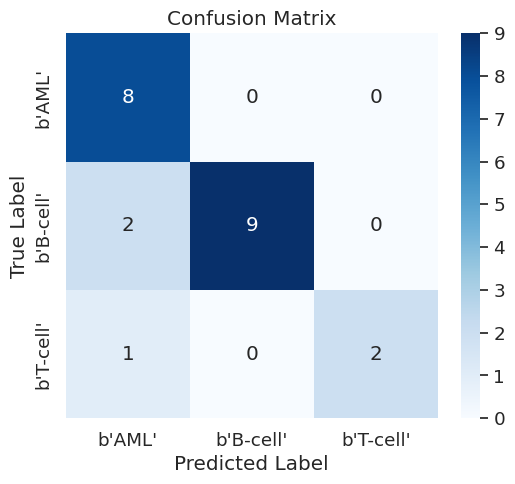

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier # Import MLPClassifier
from sklearn.metrics import confusion_matrix

# Re-split the dataset with 22 test samples (approx 30% test size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=22/72, random_state=42, stratify=y)

# Define and initialize the BPNN model here
bpnn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42) # Initialize bpnn

# Retrain the BPNN model
bpnn.fit(X_train, y_train)

# Predict on the new test set
y_pred_bpnn = bpnn.predict(X_test)

# Compute the confusion matrix
cm_bpnn = confusion_matrix(y_test, y_pred_bpnn)

# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_bpnn, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

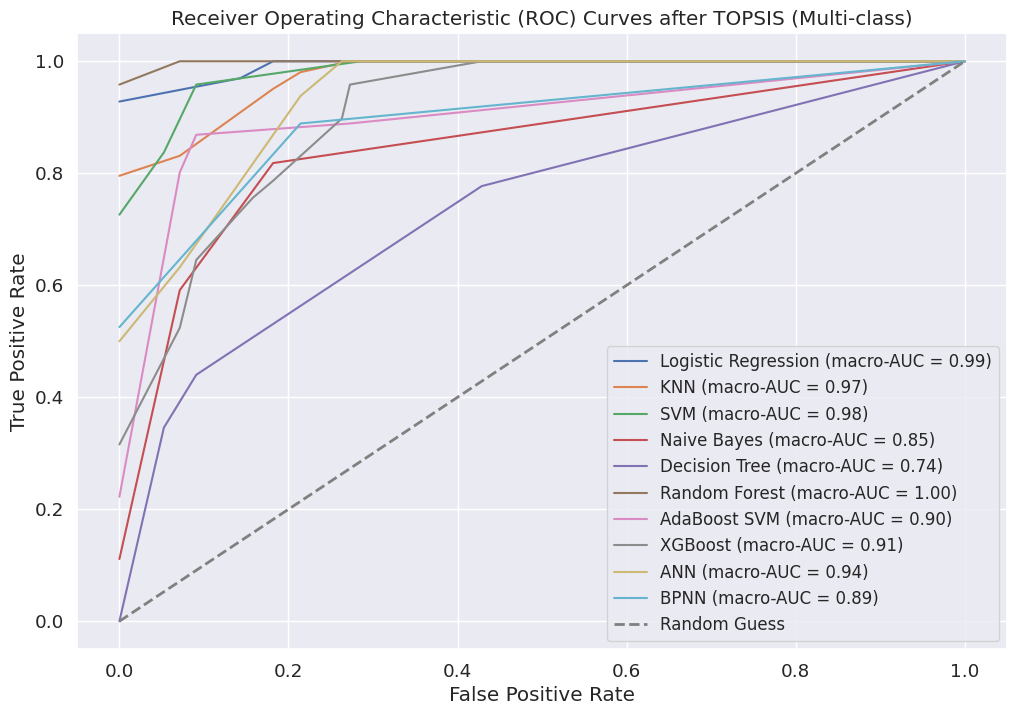

Best Accuracy of BPNN: 95.45%


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Binarize the labels for multi-class ROC (One-vs-Rest)
classes = np.unique(y_train)  # Get unique classes
y_test_binarized = label_binarize(y_test, classes=classes)
y_train_binarized = label_binarize(y_train, classes=classes)
n_classes = len(classes)

# Initialize a figure for ROC curves
plt.figure(figsize=(12, 8))

# Dictionary to store AUC scores
auc_scores = {}
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Iterate through models to calculate and plot ROC curves
for model_name, model in models.items():
    # Fit the model and get prediction probabilities
    model.fit(X_train, y_train_encoded)
    if hasattr(model, "predict_proba"):  # Check if model supports predict_proba
        y_score = model.predict_proba(X_test)
    else:  # Use decision_function for models like SVC without predict_proba
        y_score = model.decision_function(X_test)

    # Compute ROC curve and AUC for each class
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Store the macro-AUC score
    auc_scores[model_name] = roc_auc["macro"]

    # Plot the macro-average ROC curve
    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label=f'{model_name} (macro-AUC = {roc_auc["macro"]:.2f})'
    )

# Highlight the BPNN ROC curve
# bppn_auc = auc_scores["BPNN"]
# plt.plot(
#     fpr["macro"],
#     tpr["macro"],
#     label=f'BPNN (Best Accuracy, macro-AUC = {bppn_auc:.2f})',
#     linewidth=3,
#     linestyle='--'
# )

# Plot the diagonal line (random classifier) as a straight dashed line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random Guess')

# Configure the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves after TOPSIS (Multi-class)')
plt.legend(fontsize='small', loc='lower right')
plt.grid(True)
plt.show()

# # Display the best accuracy of BPNN
# bppn_accuracy = results["BPNN"]["Accuracy"]
# print(f"Best Accuracy of BPNN: {bppn_accuracy * 100:.2f}%")
